<a href="https://colab.research.google.com/github/fbolanosf/Auto_Jobs_Applier_AI_Agent/blob/main/Clasificacion_Visual_GMM_SVM_KNN_Colab_segmentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# 📤 Subir archivo desde tu computadora
from google.colab import files
uploaded = files.upload()

In [ ]:
# 📁 Cargar el archivo Excel (debe estar en /content)
df = pd.read_excel("/content/Dataset_variables_con_estado.xlsx")
df.head()


In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/19lUCw8VdMbazAUbL_9TLhkrr_mUxGP-3GCPPJNVcxLk/edit#gid=0


In [ ]:
# @title Estado vs Presion

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Presion', y='Estado', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
# 🔄 Mapear clases a números
estado_mapping = {"Normal": 0, "Intermedio": 1, "Falla": 2}
df["Estado_num"] = df["Estado"].map(estado_mapping)

# 🔢 Seleccionar variables y etiquetas
X = df[["Presion", "Temperatura", "Flujo", "Vibracion"]]
y = df["Estado_num"]

# ⚖️ Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
# 🤖 Definir y entrenar modelos
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gmm = GaussianMixture(n_components=3, random_state=42)

svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
gmm.fit(X_train)

# 🗳️ Clasificador combinado
voting = VotingClassifier(estimators=[('svm', svm), ('knn', knn)], voting='hard')
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [11]:
# 📈 Predicciones
svm_preds = svm.predict(X_test)
knn_preds = knn.predict(X_test)
gmm_preds = gmm.predict(X_test)  # GMM no usa las etiquetas reales
voting_preds = voting.predict(X_test)


In [12]:
# 📊 Función de visualización
def plot_results(title, preds):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=preds, palette='Set2', s=60)
    plt.title(title)
    plt.xlabel("Presion (normalizada)")
    plt.ylabel("Temperatura (normalizada)")
    plt.legend(title="Clase predicha")
    plt.grid(True)
    plt.show()


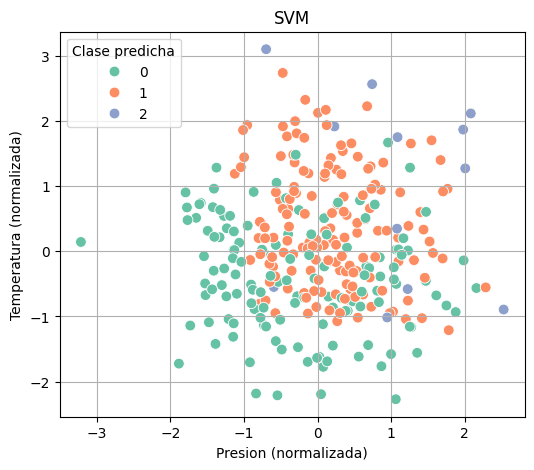

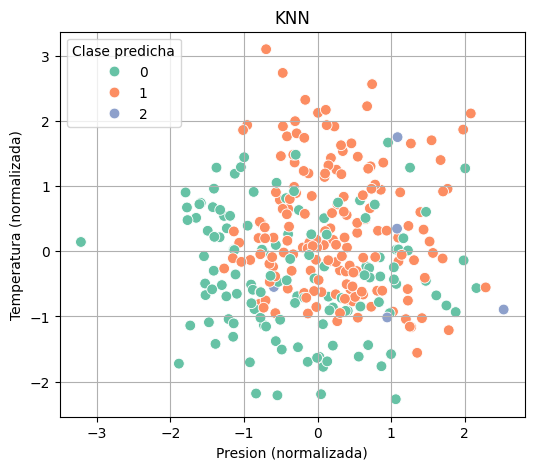

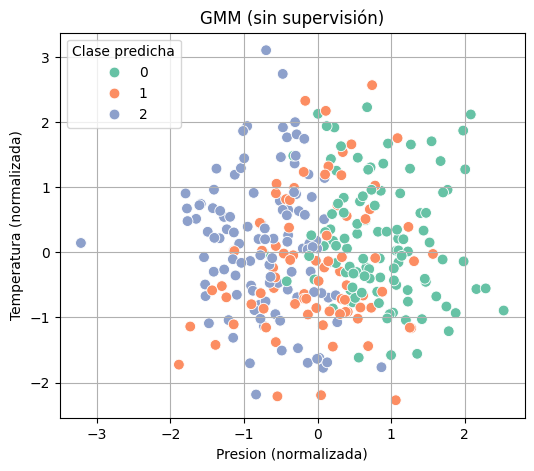

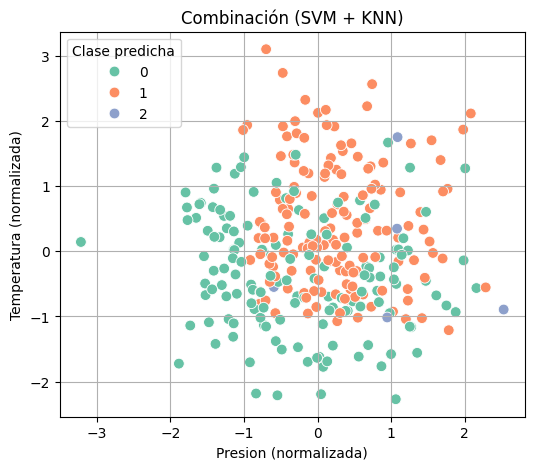

In [13]:
# 🔍 Visualizar resultados por modelo
plot_results("SVM", svm_preds)
plot_results("KNN", knn_preds)
plot_results("GMM (sin supervisión)", gmm_preds)
plot_results("Combinación (SVM + KNN)", voting_preds)


In [14]:
# ✅ Precisión de cada modelo
print("Precisión SVM:", accuracy_score(y_test, svm_preds))
print("Precisión KNN:", accuracy_score(y_test, knn_preds))
print("Precisión GMM:", accuracy_score(y_test, gmm_preds))
print("Precisión Combinada (SVM + KNN):", accuracy_score(y_test, voting_preds))


Precisión SVM: 0.8966666666666666
Precisión KNN: 0.84
Precisión GMM: 0.29333333333333333
Precisión Combinada (SVM + KNN): 0.8733333333333333
